7.3. Assume zXP = 50 mm, λ = 0.5 μm, and a rectangular XP with half widths of wx = 1 mm and wy = 0.5 mm. Use L = 1 mm and M = 250.

b)
Develop a diffraction-limited coherent image simulation with the test chart as the image. Present a surface plot of the coherent transfer function and the simulated coherent image.

c)
Develop a diffraction-limited incoherent image simulation with the test chart as the image. Present a surface plot of the OTF and the simulated incoherent image.

Enter the path to the image file: USAF_Resolution_Chart_A1-780.jpg


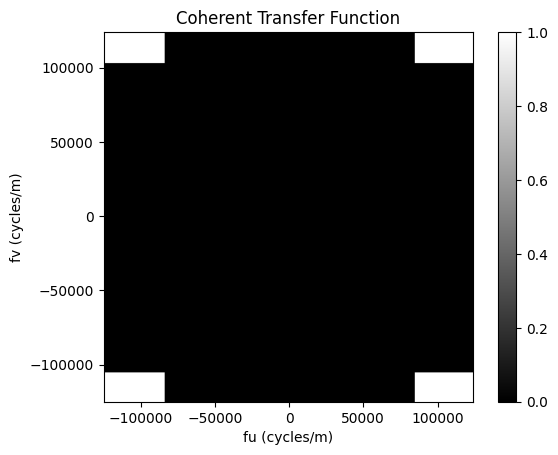

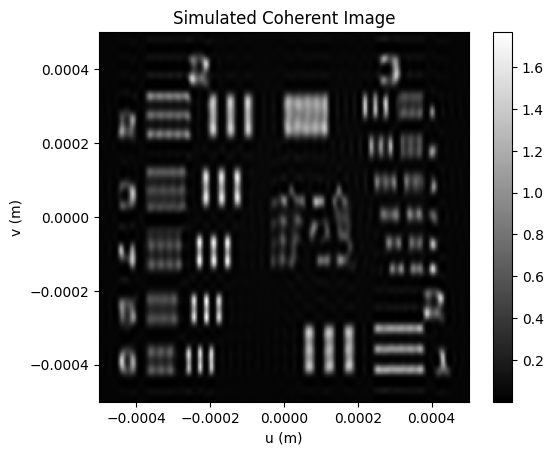

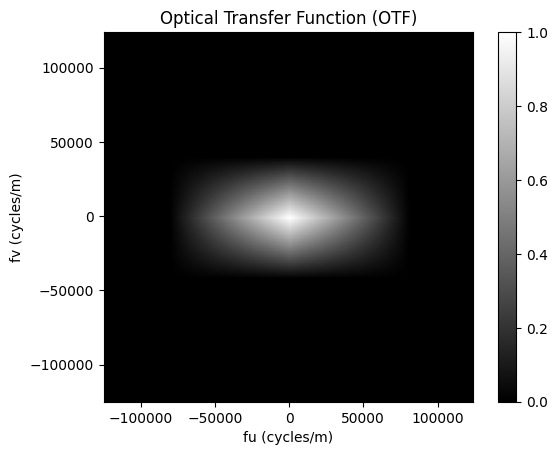

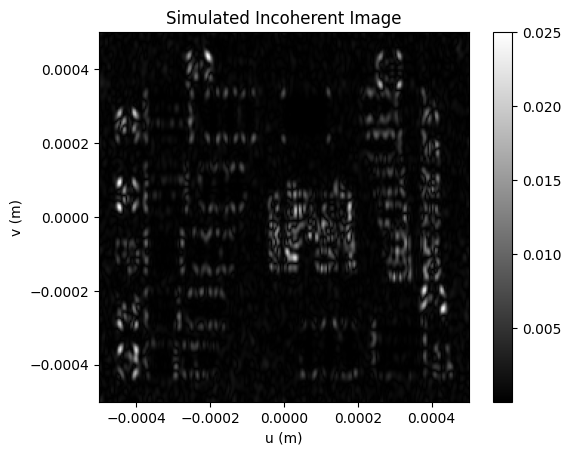

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image_path = input("Enter the path to the image file: ")
image = Image.open(image_path).convert('L')
M = 250  # Image array size
image = image.resize((M, M))
Ig = np.array(image) / 255.0  # Normalize to [0, 1]

# Define simulation parameters
lambda_wave = 0.5e-6  # Wavelength in meters
wxp = 1e-3  # Half-width of XP in x (meters)
wyp = 0.5e-3  # Half-width of XP in y (meters)
zxp = 50e-3  # XP distance (meters)
L = 1e-3  # Image plane side length (meters)
du = L / M  # Sample interval (meters)
f0x = wxp / (lambda_wave * zxp)  # Coherent cutoff frequency (x direction)
f0y = wyp / (lambda_wave * zxp)  # Coherent cutoff frequency (y direction)

# Frequency coordinates
fu = np.fft.fftfreq(M, d=du)
fv = np.fft.fftfreq(M, d=du)
Fu, Fv = np.meshgrid(fu, fv)

# Coherent transfer function (rectangle aperture)
H = np.logical_and(np.abs(Fu) <= f0x, np.abs(Fv) <= f0y).astype(float)

# Coherent Image Simulation
ug = np.sqrt(Ig)  # Ideal image field
Gg = np.fft.fft2(ug)  # Fourier transform of the ideal image
Gi = Gg * H  # Apply coherent transfer function
ui = np.fft.ifft2(Gi)  # Inverse Fourier transform
Ii = np.abs(ui)**2  # Coherent image intensity

# Plot Coherent Transfer Function
plt.figure()
plt.imshow(H, extent=(fu.min(), fu.max(), fv.min(), fv.max()), cmap='gray')
plt.title('Coherent Transfer Function')
plt.xlabel('fu (cycles/m)')
plt.ylabel('fv (cycles/m)')
plt.colorbar()
plt.show()

# Plot Coherent Image
plt.figure()
plt.imshow(Ii, extent=(-L/2, L/2, -L/2, L/2), cmap='gray')
plt.title('Simulated Coherent Image')
plt.xlabel('u (m)')
plt.ylabel('v (m)')
plt.colorbar()
plt.show()

# Incoherent Image Simulation
H_ift = np.fft.ifft2(np.abs(np.fft.fft2(H))**2)  # Autocorrelation of H
OTF = np.fft.fftshift(H_ift / H_ift.max())  # Normalized OTF
Gi_incoh = Gg * OTF  # Applied OTF
Ii_incoh = np.fft.ifft2(Gi_incoh)
Ii_incoh = np.abs(Ii_incoh)  # Incoherent image intensity

# Plot Optical Transfer Function (OTF)
plt.figure()
plt.imshow(np.abs(OTF), extent=(fu.min(), fu.max(), fv.min(), fv.max()), cmap='gray')
plt.title('Optical Transfer Function (OTF)')
plt.xlabel('fu (cycles/m)')
plt.ylabel('fv (cycles/m)')
plt.colorbar()
plt.show()

# Plot Incoherent Image
plt.figure()
plt.imshow(Ii_incoh, extent=(-L/2, L/2, -L/2, L/2), cmap='gray')
plt.title('Simulated Incoherent Image')
plt.xlabel('u (m)')
plt.ylabel('v (m)')
plt.colorbar()
plt.show()


# Question 7.4

Assume z_XP = 50 mm, λ = 0.5 μm, and an annular XP with an outer radius of w_o = 1 mm and an inner radius of w_i = 0.5 mm. Use L = 1 mm and M = 250.

### b) Develop a diffraction-limited coherent image simulation with the test chart as the image. Present a surface plot of the coherent transfer function and the simulated coherent image.


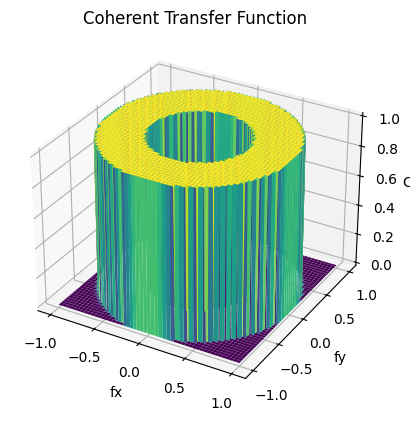

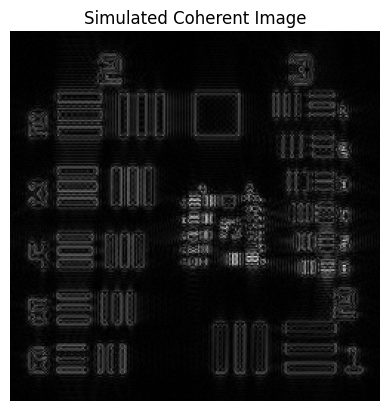

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift
from PIL import Image

lambda_ = 0.5e-6  # Wavelength in meters
P = 50e-3         # P in meters
wo = 1e-3         # Outer radius in meters
wi = 0.5e-3       # Inner radius in meters
L = 1e-3          # L in meters
M = 250           # Number of samples

# Frequency grid
fx = np.linspace(-1, 1, M)
fy = np.linspace(-1, 1, M)
FX, FY = np.meshgrid(fx, fy)
R = np.sqrt(FX**2 + FY**2)

# Annular Pupil Function (Coherent Transfer Function)
CTF = np.double((R <= wo/L) & (R >= wi/L))

# Surface plot of CTF
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(FX, FY, CTF, cmap='viridis')
ax.set_title('Coherent Transfer Function')
ax.set_xlabel('fx')
ax.set_ylabel('fy')
ax.set_zlabel('CTF')
plt.show()

image_path = 'USAF_Resolution_Chart_A1-780.jpg'
test_chart = Image.open(image_path).convert('L')
test_chart = test_chart.resize((M, M))
test_chart = np.array(test_chart)

# Applying CTF to simulate coherent image
FT_chart = fftshift(fft2(test_chart))
coherent_image = np.abs(ifft2(FT_chart * CTF))

# Displaying the simulated coherent image
plt.figure()
plt.imshow(coherent_image, cmap='gray')
plt.title('Simulated Coherent Image')
plt.axis('off')
plt.show()


### c) Develop a diffraction-limited incoherent image simulation with the test chart as the image. Present a surface plot of the OTF and the simulated incoherent image.

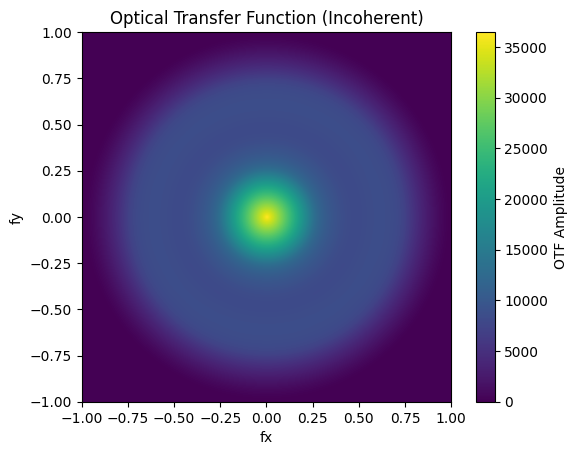

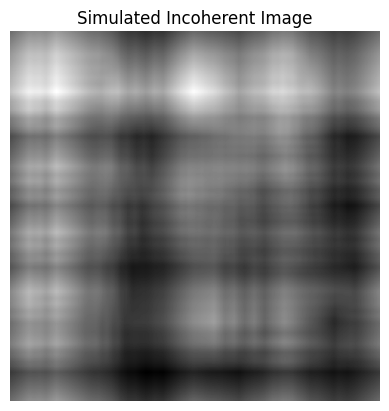

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d
from scipy.fft import fft2, ifft2, fftshift
from skimage import io, transform, color


lambda_ = 0.5e-6  # Wavelength in meters
P = 50e-3         # P in meters
wo = 1e-3         # Outer radius in meters
wi = 0.5e-3       # Inner radius in meters
L = 1e-3          # L in meters
M = 250           # Number of samples

# Frequency grid
fx = np.linspace(-1, 1, M)
fy = np.linspace(-1, 1, M)
FX, FY = np.meshgrid(fx, fy)
R = np.sqrt(FX**2 + FY**2)

# Annular Pupil Function (Coherent Transfer Function)
CTF = np.logical_and(R <= wo/L, R >= wi/L).astype(float)

# Incoherent Transfer Function (Optical Transfer Function, OTF)
OTF = correlate2d(CTF, CTF, mode='full')

# Surface plot of OTF
plt.figure()
plt.imshow(OTF, cmap='viridis', extent=[-1, 1, -1, 1])
plt.colorbar(label="OTF Amplitude")
plt.title('Optical Transfer Function (Incoherent)')
plt.xlabel('fx')
plt.ylabel('fy')
plt.show()
image_path = 'USAF_Resolution_Chart_A1-780.jpg'
test_chart = io.imread(image_path)

if len(test_chart.shape) == 3:
    test_chart = color.rgb2gray(test_chart)

# Resizing the test chart to match M
test_chart = transform.resize(test_chart, (M, M), mode='reflect')

# Simulated incoherent image
test_chart_ft = fft2(test_chart)
OTF_ft = fft2(OTF, s=(M, M))
incoherent_image = np.abs(ifft2(test_chart_ft * OTF_ft))

# Displaying the simulated incoherent image
plt.figure()
plt.imshow(incoherent_image, cmap='gray')
plt.title('Simulated Incoherent Image')
plt.axis('off')
plt.show()
